In [1]:
#EP PS4 Q4

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

In [3]:
#time domain convolution = frequency domain multiplication
#pad with zeros to avoid wrapping
def conv(x, y):
    N = x.shape[0] + y.shape[0] - 1
    
    # pad with zeros to appropriate length
    x_padded = np.zeros(N)
    x_padded[0:x.shape[0]] = x
    y_padded = np.zeros(N)
    y_padded[0:y.shape[0]] = y
    
    return np.fft.ifft( np.fft.fft(x_padded) *  np.fft.fft(y_padded) )

#for comparison to see wrapping
def conv_wrap(x, y):
    return np.fft.ifft( np.fft.fft(x) *  np.fft.fft(y) )

max im :  0.0
max im :  0.0


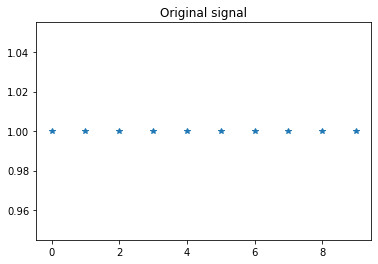

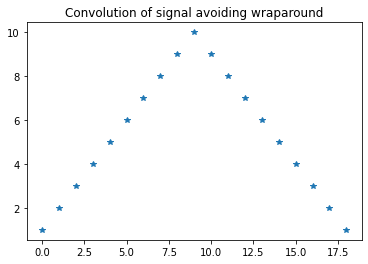

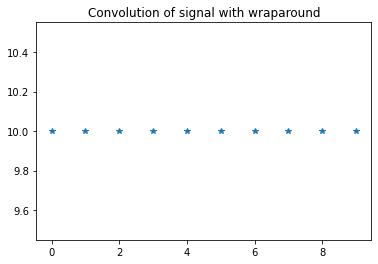

In [4]:
#test convolution function
# x = np.array([1, 3, 3, 3])
# y = np.array([3, 3, 3, 1])
x = np.ones(10)
y = np.ones(10)

#try the convolution
xconv = conv(x, y)
print('max im : ', max(np.imag(xconv))) #should be 0 or close to it
xconv = np.real(xconv)

#try the convolution with wrapping
xconv_wrap = conv_wrap(x, y)
print('max im : ', max(np.imag(xconv_wrap))) #should be 0 or close to it
xconv_wrap = np.real(xconv_wrap)


mpl.figure()
mpl.plot(x, '*')
mpl.title('Original signal')
mpl.show()

mpl.figure()
mpl.plot(xconv, '*')
mpl.title('Convolution of signal avoiding wraparound')
mpl.show()

mpl.figure()
mpl.plot(xconv_wrap, '*')
mpl.title('Convolution of signal with wraparound')
mpl.show()

Here we see that when we avoid wraparound in our signal we obtain the proper convolution that we expect - feeding in a rectangle to obtain a triangle. When wraparound occurs, all of the points in the rectangle completely overlap each time, resulting in a constant.